In [3]:
# 라이브러리 불러오기
import requests as req
# requests: 서버에게 요청 및 응답을 받기 위한 라이브러리

In [11]:
res = req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=&ackey=6c481yr6')
res
# response 200: 서버와의 요청 및 응답이 잘 이루어졌다
# Response 400: 클라이언트(요청) 부분에서 오류가 발생했다 (대표적으로 404가 있다)
# Response 500: 서버(응답) 부분에서 오류가 발생했다!

<Response [200]>

In [23]:
res.text
# string 형태의 html 문서(document)가 불러와졌다

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="strict-origin-when-cross-origin">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content=" : 네이버 검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'\'의 네이버 검색 결과입니다."> <title> : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_250529.css"> <link rel="stylesheet" type="text/

### BeatifulSoup 라이브러리
- 불러온 문서는 string 형태이기 때문에 파이썬에서 다양한 작업을 하기 불편한 형태
- string 형태의 데이터를 파이썬이 이해하기 쉬운 '파이썬 전용 객체' 형태로 변환해주는 작업 필요

In [24]:
from bs4 import BeautifulSoup as bs
# string 형태의 데이터를 파이썬 객체 형태로 변환해주는 라이브러리

In [46]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=&oquery=&tqi=j51yWlqVOswsstdlqRVssssssTV-424852&ackey=rlx5eitz'
res = req.get(url)
res.text

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="strict-origin-when-cross-origin">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content=" : 네이버 검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'\'의 네이버 검색 결과입니다."> <title> : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_250529.css"> <link rel="stylesheet" type="text/

In [47]:
# BeautifulSoup 객체화
# bs(html문서, 'parsing 방법')
bs(res.text, 'lxml')

# parser 종류: LxmL, html.parser, xml, html5Lib
# lxml: 가장 빠르고 html 문서 복구 능력이 출중, 관대함
soup = bs(res.text, 'lxml')

<!DOCTYPE html>
<html lang="ko"> <head> <meta charset="utf-8"/> <title>네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/css/2011/common.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <style type="text/css"> #u_skip{width:100%;position:relative;z-index:9999} #u_skip a{position:absolute;left:0;top:-30px;width:auto;padding:0 10px;background:url(https://ssl.pstatic.net/sstatic/search/pc/img/sp_u_skip.png) repeat-x 0 -11px;border:1px solid #03aa5a;text-align:center;outline:none;opacity:0;filter:alpha(opacity=0);-webkit-transition:.3s;-moz-transition:.3s;-o-transition:.3s;transition:.3s} #u_skip a:active,#u_skip a:focus,#content .skip:hover,#content .skip:focus,#content .skip:active{top:0;text-decoration:none;cursor:pointer;opacity:1;filter:alpha(opacity=100);zoom:1} #u_skip span{display:inline-block;padding:2px 6px 0 0;background:url(https://ssl.pstatic.net/sstatic/search/pc/
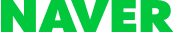

In [27]:
# bs 객체화
soup = bs(res.text, 'lxml')
soup

In [28]:
# 태그의 위치 찾는 방법
# 1. F12(개발자모드) 좌측 상단에 있는 마우스 커서 모양 아이콘 클릭
#    => 내가 가져오고자 하는 text(contents) 클릭
# 2. 내가 가져오고 싶은 text(contents) 위에 마우스 올려놓고 우클릭 => 검사


In [30]:
# span태그 가져오기
soup.select('span')
# => 해당 페이지에 있는 span태그가 모두 가져와졌다

[<span>본문 영역으로 바로가기</span>]

In [49]:
# span태그 중에서 지식in 질문 text만 가져오고 싶으니 선택해서 가져와보자
temp = soup.select('span.sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline2')
# 공백 => css에서 공백은 자손선택자 => 공백을 전부 온점으로 바꿔줘야 함
# 요소(element)에서 앞 뒤 태그를 제거하고 contents만 가져오는 명령어: .text
temp[0].text

'조선시대에는 태풍을 뭐라고 불렀나요?'

In [50]:
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%ED%98%84%EC%9E%AC%EC%98%A8%EB%8F%84&oquery=%EB%82%A0%EC%94%A8&tqi=j51G5sqVJLhsslL9RYhssssst3s-365820&ackey=l0fb4uoq'
res = req.get(url)
res

<Response [200]>

In [51]:
bs(res.text, 'lxml')
soup = bs(res.text, 'lxml')

In [52]:
soup.select_one('div.temperature_text > strong').text

'현재 온도26.8°'